In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt

# 데이터 정보
- 한국 복지 패널 데이터
 - 한국 보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지 정책을 반영할 목적으로 발간한 자료
 - 전국 7천여 가구를 선정해서 2006년도 2019년도까지 조사한 자료

In [2]:
welfare = pd.read_csv('data/welfare.csv')
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5
14414,2,1992,5,1,NaN,NaN,5
14415,1,1995,5,1,NaN,910.0,5
14416,2,1998,5,1,200.0,246.0,5


In [3]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14418 non-null  int64  
 1   birth        14418 non-null  int64  
 2   marriage     14418 non-null  int64  
 3   religion     14418 non-null  int64  
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  14418 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 788.6 KB


In [4]:
# 결측치의 개수 확인하기 - isnull() 함수
welfare.isnull() # 데이터 NaN인 경우 True, 아니면 False

welfare.isnull().sum() # True값들만 더해줌

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [5]:
# copy()함수 사용해서 데이터 복사
welfare_copy = welfare.copy()

# gender 컬럼에 이상치가 있는지 확인

In [6]:
welfare_copy['gender'].value_counts()

# 1 - man 2 - woman

gender
2    7913
1    6505
Name: count, dtype: int64

### 데이터 전처리
#### 결측치, 이상치, 컬럼이나 인덱스 변수 변경

In [7]:
# 1은 male 2 female으로 바꿔보기
## 조건에 맞춰 데이터를 변경 하는 함수 2개 있었습니다

# 1. np.where()
# 2. apply()

# np.where 사용해서 데이터 바꾸겠습니다!

welfare_copy['gender'] = np.where(welfare_copy['gender'] == 1, 'male', 'female')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,1,NaN,NaN,1
1,male,1948,2,2,NaN,NaN,1
2,male,1942,3,1,107.0,762.0,1
3,male,1962,1,1,192.0,855.0,1
4,female,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,1,NaN,NaN,5
14414,female,1992,5,1,NaN,NaN,5
14415,male,1995,5,1,NaN,910.0,5
14416,female,1998,5,1,200.0,246.0,5


In [8]:
welfare_copy['gender'].value_counts()

gender
female    7913
male      6505
Name: count, dtype: int64

In [9]:
# 결측치 확인하는 방법
# isna() vs isnull() 차이
# 없습니다.

welfare_copy['gender'].isna().sum()

0

<Axes: xlabel='gender', ylabel='count'>

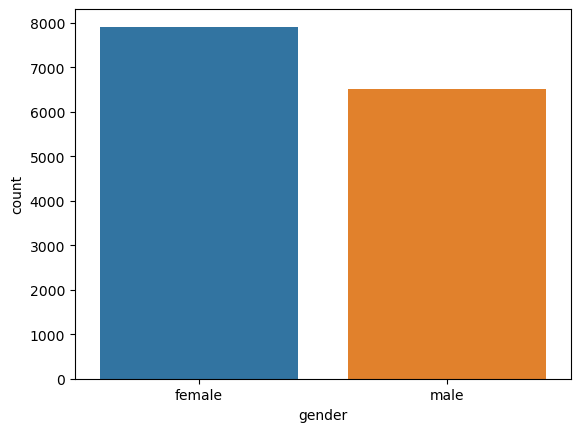

In [10]:
# countplot으로 그래프 그려보기
sns.countplot(data = welfare_copy, x = 'gender')

# 1. 종교 여부가 결혼에 영향이 있을까?

## religion 컬럼
 - 1 : 있음
 - 2 : 없음
 
 - 데이터를 1이면 yes 2면 no로 바꿔주신 후 countplot 그래프 그리기

In [11]:
welfare_copy['religion'].value_counts()

religion
2    7815
1    6603
Name: count, dtype: int64

In [12]:
welfare_copy['religion'] = np.where(welfare_copy['religion'] == 1, 'yes', 'no')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,yes,NaN,NaN,1
1,male,1948,2,no,NaN,NaN,1
2,male,1942,3,yes,107.0,762.0,1
3,male,1962,1,yes,192.0,855.0,1
4,female,1963,1,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,yes,NaN,NaN,5
14414,female,1992,5,yes,NaN,NaN,5
14415,male,1995,5,yes,NaN,910.0,5
14416,female,1998,5,yes,200.0,246.0,5


<Axes: xlabel='religion', ylabel='count'>

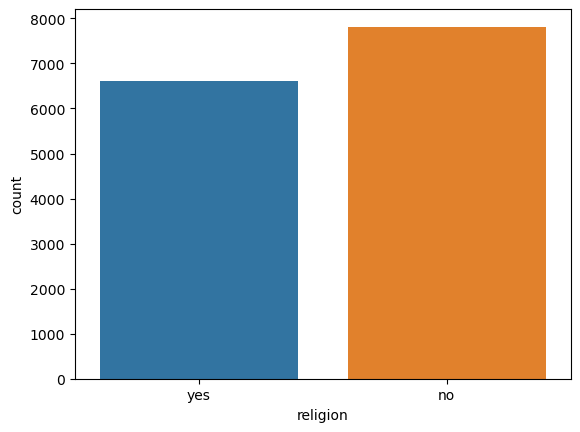

In [13]:
sns.countplot(data = welfare_copy, x = 'religion')

In [14]:
# marriage 컬럼 데이터 확인
welfare_copy['marriage'].value_counts()

marriage
1    7190
5    2357
0    2121
2    1954
3     689
4      78
6      29
Name: count, dtype: int64

In [15]:
# 결측치 확인
welfare_copy['marriage'].isna().sum()

0

# marraige 컬럼 데이터 정보
 - 0 : 미해당 (18세 미만)
 - 1 : 결혼
 - 2 : 사별
 - 3 : 이혼
 - 4 : 별거
 - 5 : 미혼
 - 6 : 기타

# 1 - marriage

# 3 - divorce

# 5 - not marriage

# 0,2,4,6 - etc

#### 실습) apply 활용해서 바꾸어 주기!

In [16]:
# welfare_copy['marriage'] = welfare_copy['marriage'].apply(lambda x: 'marriage' if x == 1 else ('divorce' if x == 3 else ('not marriage' if x == 5 else 'etc')))
# welfare_copy

In [17]:
# sns.countplot(data = welfare_copy, x = 'marriage')

In [18]:
def getMarriage(row):
    marriage = row['marriage']
    if marriage == 1:
        return 'marriage'
    elif marriage == 3:
        return 'divorce'
    elif marriage == 5:
        return 'not marriage'
    else:
        return 'etc'
    
welfare_copy['marriage'] = welfare_copy.apply(getMarriage, axis = 1)
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [19]:
welfare_copy['marriage'].value_counts()

marriage
marriage        7190
etc             4182
not marriage    2357
divorce          689
Name: count, dtype: int64

<Axes: xlabel='marriage', ylabel='count'>

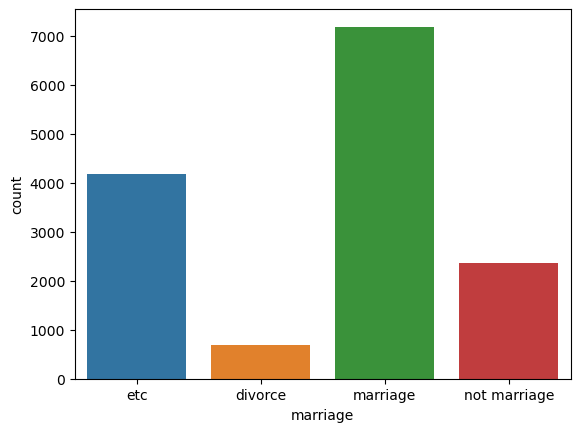

In [20]:
sns.countplot(data = welfare_copy, x = 'marriage')

# 종교유무에 따라 결혼/ 이혼율 구하기

In [21]:
# 결혼 했는지 이혼했는지 의 데이터
# 불리언 인덱싱
welfare_copy.query('marriage == "marriage"')

,gender,birth,marriage,religion,income,code_job,code_region
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
7,female,1934,marriage,yes,27.0,941.0,1
11,male,1940,marriage,no,NaN,NaN,1
...,...,...,...,...,...,...,...
14408,female,1936,marriage,no,NaN,611.0,6
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [22]:
# 이혼 여부
welfare_copy.query('marriage == "divorce"')

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
9,female,1970,divorce,yes,NaN,NaN,1
32,female,1961,divorce,yes,NaN,951.0,1
44,female,1954,divorce,no,250.0,421.0,1
57,female,1937,divorce,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14337,male,1956,divorce,no,NaN,NaN,6
14343,male,1952,divorce,yes,NaN,NaN,6
14372,male,1963,divorce,yes,NaN,NaN,1
14373,male,1950,divorce,yes,NaN,NaN,5


In [23]:
# 결혼 한 사람들의 종교 유무 파악
welfare_copy.query('marriage == "marriage"').groupby('religion').size().reset_index(name='cnt')

,religion,cnt
0,no,3660
1,yes,3530


#### 결혼 여부가 종교의 유무와는 큰 상관이 없다

# 퍼센테이지로 나타내기

In [24]:
wel_marr = welfare_copy.query("marriage == 'marriage' or marriage == 'divorce'")

In [25]:
wel_marr.groupby('religion').agg(cnt = ('religion', 'count'))

,cnt
religion,
no,4044
yes,3835


In [26]:
wel_per = wel_marr.groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)

In [27]:
wel_per['proportion'] = wel_per['proportion'] * 100
wel_per

,religion,marriage,proportion
0,no,marriage,90.504451
1,no,divorce,9.495549
2,yes,marriage,92.046936
3,yes,divorce,7.953064


<Axes: xlabel='religion', ylabel='proportion'>

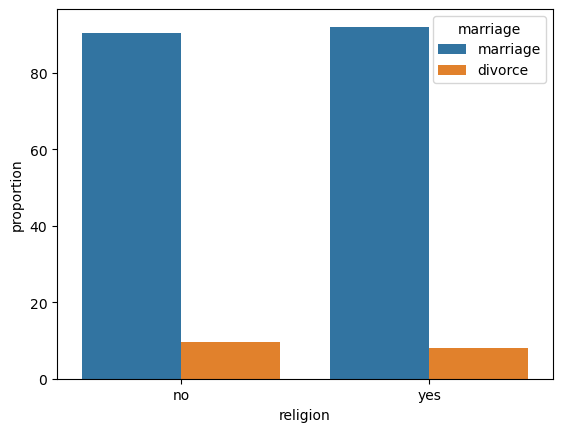

In [28]:
sns.barplot(data = wel_per, x = 'religion', y = 'proportion', hue = 'marriage')

# 종교와 이혼은 크게 관련이 없다

# 성별 별 수입 확인

In [29]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [30]:
welfare_copy['income'].isna().sum()

9884

In [31]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [32]:
# 이상치 발견
# min값이 왜 0일까?
# query함수로 income == 0
welfare_copy.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### encoding = 무언가를 코드화 한다는 뜻

 - 한국말이 있는 경우 encoding을 진행
 - euc-kr, utf-8

In [33]:
job_code = pd.read_csv('data/job_code.csv', encoding='euc-kr')

In [34]:
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [35]:
job_code.query("code_job == 252 | code_job == 243 | code_job == 311 | code_job == 313 |code_job == 320")

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [36]:
welfare_copy.query('income == 0')
# 해당 7개의 데이터는 실제로 이상치입니다

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### 이상치를 해결하기 위한 방법
 - 해당 직군의 수입 알아보기
 
## 데이터 오류 해결 방법 2가지
 - 1. 데이터 버리기 (주로 삭제해도 무방할때)
 - 2. 데이터 채워주기
  - 평균값과 "중간값"의 차이

In [37]:
welfare_copy.query('code_job == 243')

,gender,birth,marriage,religion,income,code_job,code_region
144,female,1989,not marriage,no,208.0,243.0,1
250,female,1990,not marriage,yes,248.0,243.0,2
356,female,1978,marriage,yes,658.0,243.0,1
708,female,1987,marriage,no,305.0,243.0,2
929,female,1956,marriage,yes,258.0,243.0,1
...,...,...,...,...,...,...,...
12764,female,1996,not marriage,no,160.0,243.0,7
12863,female,1983,not marriage,no,436.0,243.0,2
13113,female,1962,not marriage,no,416.0,243.0,7
13391,female,1983,not marriage,no,258.0,243.0,3


In [38]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [39]:
# code_job == NaN 값인데 수입이 있는 사람
welfare_copy.query('code_job.isna() and income.notna()')
# 다행히 없습니다

,gender,birth,marriage,religion,income,code_job,code_region


In [40]:
# income nan값인사람
# 이상치 7명 존재
# 결측치 + 이상치 9891개
welfare_copy['income'].isna().sum()

9884

In [41]:
welfare_copy.query('code_job.notna() and income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
22,male,1975,not marriage,yes,NaN,521.0,1
23,male,1978,marriage,no,NaN,151.0,1
24,female,1982,marriage,no,NaN,521.0,1
32,female,1961,divorce,yes,NaN,951.0,1
33,female,1982,marriage,no,NaN,531.0,1
...,...,...,...,...,...,...,...
14399,male,1941,marriage,no,NaN,611.0,6
14408,female,1936,marriage,no,NaN,611.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [43]:
# income == NaN, code_job == NaN 인 값들 drop()
# drop(인덱스, axis = 0)

drop_index = welfare_copy[(welfare_copy['income'].isna()) & (welfare_copy['code_job'].isna())].index
welfare_drop = welfare_copy.drop(drop_index)
welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   int64  
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 429.9+ KB


In [44]:
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
7,female,1934,marriage,yes,27.0,941.0,1
8,female,1940,etc,yes,27.0,999.0,2
14,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5
14415,male,1995,not marriage,yes,NaN,910.0,5


In [47]:
# 인덱스 정리
welfare_drop.index = range(1, len(welfare_drop) + 1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,NaN,611.0,6
6876,male,1967,marriage,yes,NaN,874.0,5
6877,male,1995,not marriage,yes,NaN,910.0,5


In [ ]:
code_